<a href="https://colab.research.google.com/github/NayanaSwami/Loan_Prediction_Assignment/blob/main/LoanDefaultAnalysis_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pwd
! mkdir "./LoanDefaultAnalysis"
%cd LoanDefaultAnalysis/

/content/LoanDefaultAnalysis


In [ ]:
! pip list

In [ ]:
! pip install autoviz
! pip install sweetviz
! pip install pandas_profiling --upgrade

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
import sys

In [ ]:
url = "https://raw.githubusercontent.com/lemoinef/Loan-Default-Prediction/master/loans_2007.csv"
raw_data = pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,Oct-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014,649.91,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,73.71,73.71,3987.860000,3987.86,2926.29,1061.57,0.00,0.0,0.00,Dec-2016,67.79,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [ ]:
raw_data.to_csv("raw_loan_default.csv",index=False)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42538 non-null  object 
 1   member_id                   42535 non-null  float64
 2   loan_amnt                   42535 non-null  float64
 3   funded_amnt                 42535 non-null  float64
 4   funded_amnt_inv             42535 non-null  float64
 5   term                        42535 non-null  object 
 6   int_rate                    42535 non-null  object 
 7   installment                 42535 non-null  float64
 8   grade                       42535 non-null  object 
 9   sub_grade                   42535 non-null  object 
 10  emp_title                   39909 non-null  object 
 11  emp_length                  41423 non-null  object 
 12  home_ownership              42535 non-null  object 
 13  annual_inc                  425

In [ ]:
data = pd.read_excel("LCDataDictionary.xlsx")
data

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


In [ ]:
raw_data.shape

(42538, 52)

In [ ]:
raw_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

#  **Analysis of Varriable**

Breaking down 52 features into set of 4 with 13 features and anlayzing them for understanding its significance and usages

In [ ]:
features_1st_13_set = ['id','member_id','loan_amnt','funded_amnt','funded_amnt_inv','term',
            'int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership']
data[data["LoanStatNew"].isin(features_1st_13_set)]

,LoanStatNew,Description
19,emp_length,Employment length in years. Possible values ar...
20,emp_title,The job title supplied by the Borrower when ap...
23,funded_amnt,The total amount committed to that loan at tha...
24,funded_amnt_inv,The total amount committed by investors for th...
25,grade,LC assigned loan grade
26,home_ownership,The home ownership status provided by the borr...
27,id,A unique LC assigned ID for the loan listing.
33,installment,The monthly payment owed by the borrower if th...
34,int_rate,Interest Rate on the loan
41,loan_amnt,The listed amount of the loan applied for by t...


In [ ]:
raw_data.loc[:5,features_1st_13_set]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT
5,1075269,1311441.0,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT


In [ ]:
#We drop the columns enumerated in the cell above.
drop_col_1st_set = ['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 
                              'grade', 'sub_grade', 'emp_title']

In [ ]:
features_2nd_13_set = ['annual_inc','verification_status','issue_d','loan_status','pymnt_plan','purpose',
             'title','zip_code','addr_state','dti','delinq_2yrs','earliest_cr_line', 'inq_last_6mths']
data[data["LoanStatNew"].isin(features_2nd_13_set)]

,LoanStatNew,Description
2,addr_state,The state provided by the borrower in the loan...
4,annual_inc,The self-reported annual income provided by th...
13,delinq_2yrs,The number of 30+ days past-due incidences of ...
16,dti,A ratio calculated using the borrower’s total ...
18,earliest_cr_line,The month the borrower's earliest reported cre...
32,inq_last_6mths,The number of inquiries in past 6 months (excl...
35,issue_d,The month which the loan was funded
42,loan_status,Current status of the loan
87,purpose,A category provided by the borrower for the lo...
88,pymnt_plan,Indicates if a payment plan has been put in pl...


In [ ]:
raw_data.loc[:5,features_2nd_13_set]

,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths
0,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0
1,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0
2,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0
3,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0
4,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0
5,36000.0,Source Verified,Dec-2011,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0


In [ ]:
drop_col_2nd_set = ['issue_d','zip_code']

In [ ]:
features_3rd_13_set = ['open_acc', 'pub_rec', 'revol_bal','revol_util','total_acc', 'initial_list_status','out_prncp',
            'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int', 'total_rec_late_fee']
data[data["LoanStatNew"].isin(features_3rd_13_set)]

,LoanStatNew,Description
29,initial_list_status,The initial listing status of the loan. Possib...
73,open_acc,The number of open credit lines in the borrowe...
80,out_prncp,Remaining outstanding principal for total amou...
81,out_prncp_inv,Remaining outstanding principal for portion of...
85,pub_rec,Number of derogatory public records
90,revol_bal,Total credit revolving balance
91,revol_util,"Revolving line utilization rate, or the amount..."
99,total_acc,The total number of credit lines currently in ...
105,total_pymnt,Payments received to date for total amount funded
106,total_pymnt_inv,Payments received to date for portion of total...


In [ ]:
raw_data.loc[:5,features_3rd_13_set]

,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee
0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00
1,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1014.530000,1014.53,456.46,435.17,0.00
2,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00
3,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97
4,15.0,0.0,27783.0,53.9%,38.0,f,73.71,73.71,3987.860000,3987.86,2926.29,1061.57,0.00
5,9.0,0.0,7963.0,28.3%,12.0,f,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00


In [ ]:
drop_col_3rd_set = ['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                              'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee']

In [ ]:
features_4th_13_set = ['recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt','last_credit_pull_d',
             'collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths',
             'delinq_amnt','pub_rec_bankruptcies','tax_liens']
data[data["LoanStatNew"].isin(features_4th_13_set)]

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
6,application_type,Indicates whether the loan is an individual ap...
10,chargeoff_within_12_mths,Number of charge-offs within 12 months
11,collection_recovery_fee,post charge off collection fee
12,collections_12_mths_ex_med,Number of collections in 12 months excluding m...
14,delinq_amnt,The past-due amount owed for the accounts on w...
36,last_credit_pull_d,The most recent month LC pulled credit for thi...
39,last_pymnt_amnt,Last total payment amount received
40,last_pymnt_d,Last month payment was received
84,policy_code,publicly available policy_code=1\nnew products...


In [ ]:
raw_data.loc[:5,features_4th_13_set]

,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,0.0,0.00,Jan-2015,171.62,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,122.9,1.11,Apr-2013,119.66,Oct-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,Jun-2014,649.91,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00,Dec-2016,67.79,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
5,0.0,0.00,Jan-2015,161.03,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [ ]:
drop_col_4th_set = ['recoveries', 'collection_recovery_fee', 
                              'last_pymnt_d', 'last_pymnt_amnt']

In [ ]:
columns_to_drop = drop_col_1st_set+drop_col_2nd_set+drop_col_3rd_set+drop_col_4th_set

In [ ]:
columns_to_drop

['id',
 'member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'sub_grade',
 'emp_title',
 'issue_d',
 'zip_code',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt']

In [ ]:
filtered_data = raw_data.drop(columns_to_drop, axis =1)

In [ ]:
filtered_data.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,bike,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,Oct-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,other,personel,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,Current,n,other,Personal,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [ ]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42535 non-null  float64
 1   term                        42535 non-null  object 
 2   int_rate                    42535 non-null  object 
 3   installment                 42535 non-null  float64
 4   emp_length                  41423 non-null  object 
 5   home_ownership              42535 non-null  object 
 6   annual_inc                  42531 non-null  float64
 7   verification_status         42535 non-null  object 
 8   loan_status                 42535 non-null  object 
 9   pymnt_plan                  42535 non-null  object 
 10  purpose                     42535 non-null  object 
 11  title                       42522 non-null  object 
 12  addr_state                  42535 non-null  object 
 13  dti                         425

In [ ]:
filtered_data.shape

(42538, 32)

In [ ]:
filtered_data.to_csv("filtered_loan_default.csv",index=False)

In [ ]:
filtered_data["loan_status"].value_counts()

Fully Paid                                             34085
Charged Off                                             5662
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                   19
Late (31-120 days)                                         9
In Grace Period                                            8
Late (16-30 days)                                          2
Default                                                    1
Name: loan_status, dtype: int64

In [ ]:
import matplotlib

In [ ]:
matplotlib.__version__

'3.1.3'

In [ ]:
# ! pip install matplotlib==3.1.3

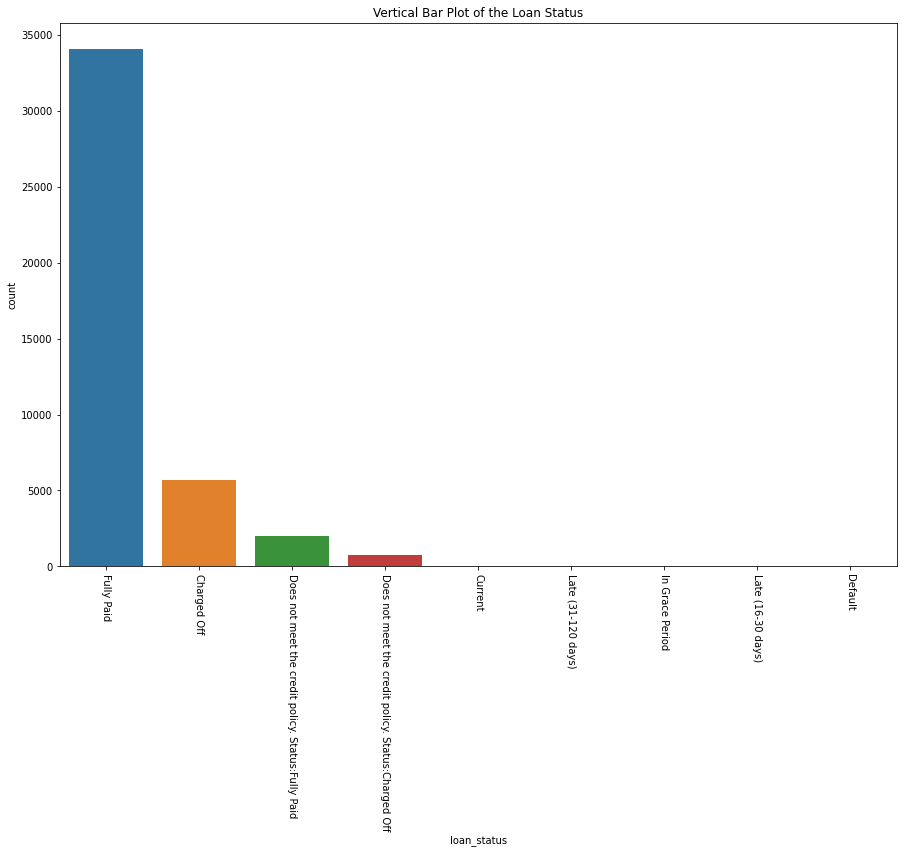

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="loan_status",data=filtered_data,
              order = filtered_data["loan_status"].value_counts().index)
plt.title("Vertical Bar Plot of the Loan Status")
plt.xticks(rotation=270)
plt.show()

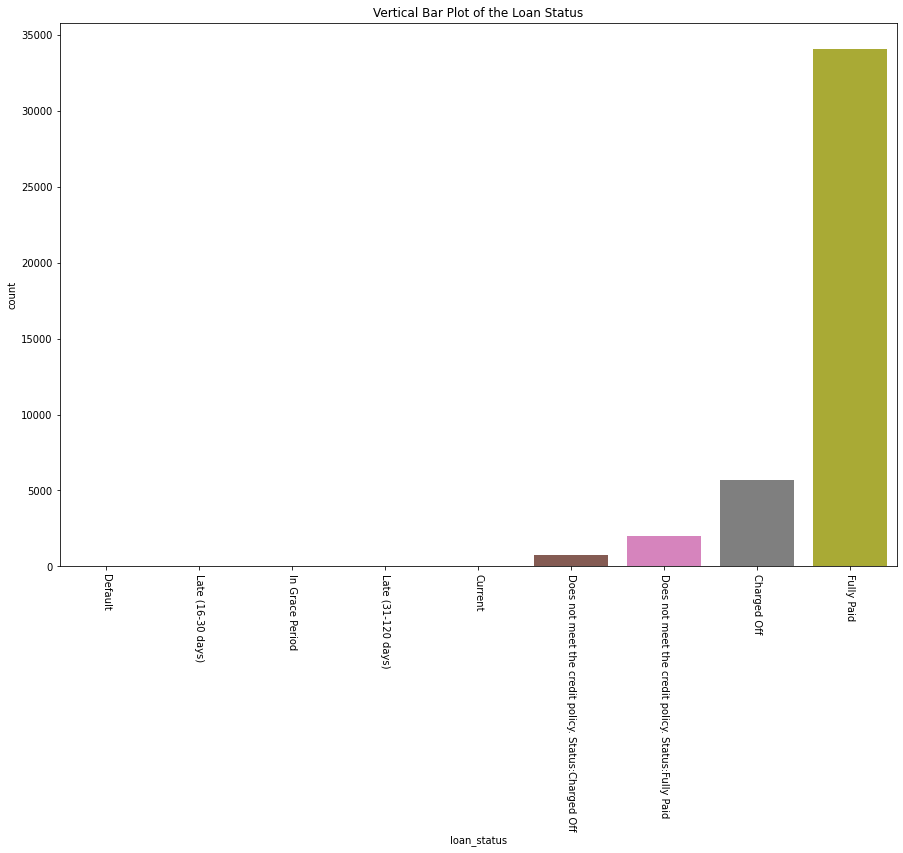

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="loan_status",data=filtered_data,
              order = filtered_data["loan_status"].value_counts(ascending=True).index)
plt.title("Vertical Bar Plot of the Loan Status")
plt.xticks(rotation=270)
plt.show()

We have 9 possibility for loan_status and only 2 values are important in our model's binary classification; fully paid and charged off. These 2 values indicate the result of the loan outcome. We will remove the other possibilities and avoid "translating" those values into the binary possibility (fully paid or charged off).

In [ ]:
df = filtered_data[filtered_data['loan_status'].isin(["Fully Paid","Charged Off"])]

In [ ]:
df.to_csv("loan_data.csv",index=False)

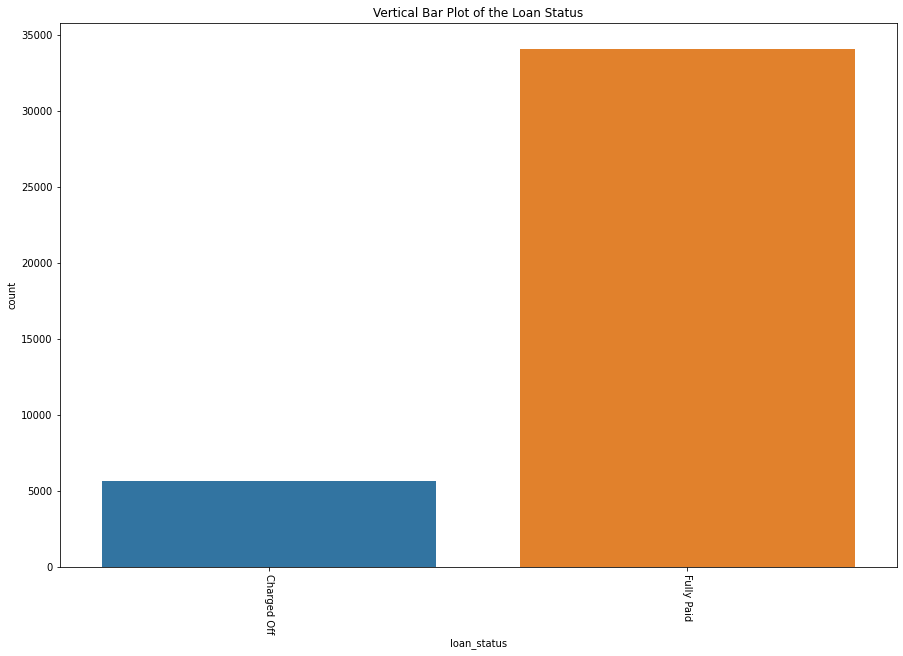

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="loan_status",data=df,
              order = df["loan_status"].value_counts(ascending=True).index)
plt.title("Vertical Bar Plot of the Loan Status")
plt.xticks(rotation=270)
plt.show()

# **Exploratory Data Analysis**

*  Performing automated EDA using packages pandas_profiling and sweetviz.
*  Performing mannual EDA using startegies learnt.

### Automated EDA

In [ ]:
import pandas_profiling
profile  = pandas_profiling.ProfileReport(filtered_data, title="Pandas Profiling Report")
profile.to_file("loan_default_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import sweetviz
my_report  = sweetviz.analyze(filtered_data)
my_report.show_html('FinalReport.html')

                                             |          | [  0%]   00:00 -> (? left)

Report FinalReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Manual EDA

In [ ]:
## Do it here Yourself
# Questions:
# 1.	Distribution of Numerical attributes (distplot and histogram)
      # a.	Loan amount
      # b.	Interest Rate
      # c.	Installment
      # d.	Annual Income
      # e.	Revol Balance
      # f.	Revol Utilization
# 2.	Unique and counts of Categorical attributes (Countplot , pie-chart)
      # a.	Term
      # b.	Employment Length
      # c.	Home Ownership
      # d.	Verification Status
      # e.	Purpose/Title
# 3.	Relation between two numerical attributes(scatter plot)
      # a.	6C2
# 4.	Correlation Matrix is between numerical values
# 5.	Relation between Numerical and categorical values
      # a.	All Numerical attributes wrt. Loan Status
      # b.	All Numerical attributes wrt. Loan Status add the hue with all categorical values one at a time.


# **Data Pre-Processing using Python**

### **Data Quality|Sanity|Integrity Check**

In [ ]:
df.describe(include =np.object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,term,int_rate,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,earliest_cr_line,revol_util,initial_list_status,last_credit_pull_d,application_type
count,39747,39747,38671,39747,39747,39747,39747,39747,39736,39747,39747,39697,39747,39745,39747
unique,2,371,11,5,3,2,1,14,19632,50,526,1089,1,113,1
top,36 months,10.99%,10+ years,RENT,Not Verified,Fully Paid,n,debt_consolidation,Debt Consolidation,CA,Nov-1998,0%,f,Dec-2016,INDIVIDUAL
freq,29096,958,8888,18897,16923,34085,39747,18651,2187,7101,369,980,39747,10638,39747


In [ ]:
df.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39747.000000,39747.000000,3.974700e+04,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000,39691.0,39747.0,39747.0,39691.0,39747.0,39050.000000,39708.0
mean,11225.755403,324.652461,6.898086e+04,13.315923,0.146502,0.869022,9.292827,0.055174,13388.582836,22.085868,0.0,1.0,0.0,0.0,0.0,0.043303,0.0
std,7460.917599,208.889015,6.378726e+04,6.678206,0.491817,1.070176,4.400069,0.237716,15899.681549,11.400633,0.0,0.0,0.0,0.0,0.0,0.204421,0.0
min,500.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5500.000000,167.080000,4.050000e+04,8.180000,0.000000,0.000000,6.000000,0.000000,3701.500000,13.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,10000.000000,280.390000,5.900000e+04,13.410000,0.000000,1.000000,9.000000,0.000000,8855.000000,20.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,430.780000,8.231400e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17062.500000,29.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [ ]:
orig_columns = df.columns
drop_columns = []
for col in orig_columns:
    col_series = df[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
df = df.drop(drop_columns, axis = 1)
drop_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [ ]:
df.shape

(39747, 23)

### **Handling|Dealing|Treating Missing Values**

https://scikit-learn.org/stable/modules/impute.html

Preparing The Features: Dealing With Missing Values
We start with the filtered loan_data.csv from the previous analysis. Do we have many Null values in the file loan_data? 

We will look at how we can handle these values. We need to deal with non-numeric value and null values, because scikit-learn assume that the values are numeric and filled, otherwise it could throw an error or miss evaluate the data.

In [ ]:
null_count = df.isnull().sum()
null_count

loan_amnt                  0
term                       0
int_rate                   0
installment                0
emp_length              1076
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

We have 4 columns with missing values: 2 with last_credit_pull_d, 10 with title, 50 with revol_util and 697 with pub_rec_bankruptcies . Instead of removing the columns as we did earlier, we will remove the rows. We consider rows as incomplete (in a real life setting, we would reject the application simply because it is not complete).

In [ ]:
df = df.drop("pub_rec_bankruptcies", axis=1)
df = df.dropna(axis=0)

In [ ]:
null_count = df.isnull().sum()
null_count

loan_amnt              0
term                   0
int_rate               0
installment            0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
title                  0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
last_credit_pull_d     0
dtype: int64

### **Handling|Dealing|Treating  Categorical|String Values**

In [ ]:
print(df.dtypes.value_counts())

object     12
float64    10
dtype: int64


In [ ]:
object_columns_df = df.select_dtypes(include=["object"])
object_columns_df.columns

Index(['term', 'int_rate', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'title', 'addr_state',
       'earliest_cr_line', 'revol_util', 'last_credit_pull_d'],
      dtype='object')

In [ ]:
object_columns_df.iloc[0]

term                     36 months
int_rate                    10.65%
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
loan_status             Fully Paid
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        Dec-2016
Name: 0, dtype: object

Some of the data seems categorical, this means that we might be able to change it into numerical. Let's count the number of occurences of each column.

* term is either 36 or 60.

* emp_length is the "Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years."

* home_ownership can only be 1 of 4 categorical data.

* verification_status "Indicates if income was verified by (Lending Club), not verified, or if the income source was verified". One of 2 choices.

* addr_state: "The state provided by the borrower in the loan application"

In [ ]:
columns = ['term', 'emp_length', 'home_ownership', 'verification_status', 'addr_state']
for col in columns:
    print(df[col].value_counts())
    print(" ")

 36 months    28234
 60 months    10378
Name: term, dtype: int64
 
10+ years    8886
< 1 year     4573
2 years      4387
3 years      4090
4 years      3429
5 years      3279
1 year       3236
6 years      2224
7 years      1770
8 years      1480
9 years      1258
Name: emp_length, dtype: int64
 
RENT        18451
MORTGAGE    17226
OWN          2836
OTHER          96
NONE            3
Name: home_ownership, dtype: int64
 
Not Verified       16466
Verified           12354
Source Verified     9792
Name: verification_status, dtype: int64
 
CA    6903
NY    3707
FL    2776
TX    2672
NJ    1821
IL    1486
PA    1480
VA    1377
GA    1357
MA    1312
OH    1190
MD    1033
AZ     831
WA     806
CO     768
NC     760
CT     733
MI     688
MO     661
MN     591
NV     482
SC     464
WI     444
OR     434
AL     431
LA     426
KY     323
OK     293
KS     260
UT     252
AR     235
DC     212
RI     197
NM     183
HI     169
WV     168
NH     162
DE     110
WY      79
MT      79
AK      77
SD     

The previous four columns contain a couple categorical values, we will encode them as dummy variables for our model. We will remove the addr_state because if we were to encode all these variables, we would make our dataframe quite large and would slow the computation done by our machine learning algorithm.

Let's now take a look at the next columns:

* purpose is "a category provided by the borrower for the loan request".

* title : "The loan title provided by the borrower"

In [ ]:
print(df["purpose"].value_counts())
print(" ")
print(df["title"].value_counts())

debt_consolidation    18239
credit_card            4999
other                  3821
home_improvement       2883
major_purchase         2108
small_business         1779
car                    1497
wedding                 934
medical                 668
moving                  557
house                   369
vacation                351
educational             312
renewable_energy         95
Name: purpose, dtype: int64
 
Debt Consolidation            2145
Debt Consolidation Loan       1691
Personal Loan                  643
Consolidation                  508
debt consolidation             488
                              ... 
Last Credit Card Refinance       1
Fidelity Payoff                  1
DYLAN'S PERSONAL LOAN            1
Pay down debt loan               1
JAL Loan                         1
Name: title, Length: 19133, dtype: int64


The 2 columns seem to have similar information. We will keep the purpose column as the title column is probably added by the customer and can vary. The purpose is streamlined in comparison with the title containing a lot of the same just under a different form (debt consolidation written in different ways).

The next values are dates.

* earliest_cr_line: "The month the borrower's earliest reported credit line was opened"

* last_credit_pull_d: "The most recent month LC pulled credit for this loan"

These values are a already numerical, but mean something else.

* int_rate is the percentage of the interest, that way we know that it is x%.

* revol_util: "Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."

The reason the loan was asked for.

We need to encode categorical value with dummy variables.

In [ ]:
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}
df = df.drop(["last_credit_pull_d", "earliest_cr_line", "addr_state", "title"], axis=1)
df["int_rate"] = df["int_rate"].str.rstrip("%").astype("float")
df["term"] = df["term"].apply(lambda x: float(x.replace("months","")))
# df["int_rate"] = df["int_rate"].apply(lambda x: float(x.replace("%","")))
# df["int_rate"] = df["int_rate"].apply(lambda x: float(x.split("%")[0]))
df["revol_util"] = df["revol_util"].str.rstrip("%").astype("float")
df = df.replace(mapping_dict)

In [ ]:
df

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000.0,36.0,10.65,162.87,10,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0
1,2500.0,60.0,15.27,59.83,0,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0
2,2400.0,36.0,15.96,84.33,10,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0
3,10000.0,36.0,13.49,339.31,10,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0
5,5000.0,36.0,7.90,156.46,3,RENT,36000.0,Source Verified,Fully Paid,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,36.0,8.07,78.42,4,MORTGAGE,110000.0,Not Verified,Fully Paid,home_improvement,11.33,0.0,0.0,13.0,0.0,7274.0,13.1,40.0
39782,8500.0,36.0,10.28,275.38,3,RENT,18000.0,Not Verified,Fully Paid,credit_card,6.40,1.0,1.0,6.0,0.0,8847.0,26.9,9.0
39783,5000.0,36.0,8.07,156.84,0,MORTGAGE,100000.0,Not Verified,Fully Paid,debt_consolidation,2.30,0.0,0.0,11.0,0.0,9698.0,19.4,20.0
39784,5000.0,36.0,7.43,155.38,0,MORTGAGE,200000.0,Not Verified,Fully Paid,other,3.72,0.0,0.0,17.0,0.0,85607.0,0.7,26.0


**One-hot encoding** is used to convert categorical variables into a format that can be used by machine learning algorithms.

The basic idea of one-hot encoding is to create new variables that take on values 0 and 1 to represent the original categorical values.

For example, the following image shows how we would perform one-hot encoding to convert a categorical variable that contains team names into new variables that contain only 0 and 1 values:

![](https://www.statology.org/wp-content/uploads/2021/09/oneHot1-768x357.png)

In [ ]:
df

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000.0,36 months,10.65,162.87,10,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0
1,2500.0,60 months,15.27,59.83,0,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0
2,2400.0,36 months,15.96,84.33,10,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0
3,10000.0,36 months,13.49,339.31,10,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0
5,5000.0,36 months,7.90,156.46,3,RENT,36000.0,Source Verified,Fully Paid,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,36 months,8.07,78.42,4,MORTGAGE,110000.0,Not Verified,Fully Paid,home_improvement,11.33,0.0,0.0,13.0,0.0,7274.0,13.1,40.0
39782,8500.0,36 months,10.28,275.38,3,RENT,18000.0,Not Verified,Fully Paid,credit_card,6.40,1.0,1.0,6.0,0.0,8847.0,26.9,9.0
39783,5000.0,36 months,8.07,156.84,0,MORTGAGE,100000.0,Not Verified,Fully Paid,debt_consolidation,2.30,0.0,0.0,11.0,0.0,9698.0,19.4,20.0
39784,5000.0,36 months,7.43,155.38,0,MORTGAGE,200000.0,Not Verified,Fully Paid,other,3.72,0.0,0.0,17.0,0.0,85607.0,0.7,26.0


In [ ]:
categorical_columns = ["home_ownership", "verification_status", "purpose"]
dummy_df = pd.get_dummies(df[categorical_columns])


In [ ]:
dummy_df

,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
39782,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
39783,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
39784,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df = pd.concat([df, dummy_df], axis=1)
df = df.drop(categorical_columns, axis=1)

In [ ]:
df.head()


,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,36.0,10.65,162.87,10,24000.0,Fully Paid,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,60.0,15.27,59.83,0,30000.0,Charged Off,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,36.0,15.96,84.33,10,12252.0,Fully Paid,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,36.0,13.49,339.31,10,49200.0,Fully Paid,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,5000.0,36.0,7.90,156.46,3,36000.0,Fully Paid,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38612 entries, 0 to 39785
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            38612 non-null  float64
 1   term                                 38612 non-null  float64
 2   int_rate                             38612 non-null  float64
 3   installment                          38612 non-null  float64
 4   emp_length                           38612 non-null  int64  
 5   annual_inc                           38612 non-null  float64
 6   loan_status                          38612 non-null  object 
 7   dti                                  38612 non-null  float64
 8   delinq_2yrs                          38612 non-null  float64
 9   inq_last_6mths                       38612 non-null  float64
 10  open_acc                             38612 non-null  float64
 11  pub_rec                     

### **Handling|Dealing|Treating Outliers**



What is an outlier?
Imagine the series of values [3, 2, 3, 4, 999] (where the 999 seemingly doesn't fit in) and analyse various ways of outlier detection

**Z-Score**
The problem here is that the value in question distorts our measures mean and std heavily, resulting in inconspicious z-scores of roughly [-0.5, -0.5, -0.5, -0.5, 2.0], keeping every value within two standard deviations of the mean. One very large outlier might hence distort your whole assessment of outliers. I would discourage this approach.

**Quantile Filter**
A way more robust approach is given is this answer, eliminating the bottom and top 1 % of data. However, this eliminates a fixed fraction independant of the question if these data are really outliers. You might loose a lot of valid data, and on the other hand still keep some outliers if you have more than 1 % or 2 % of your data as outliers.

**IQR-distance from Median**
Even more robust version of the quantile principle: Eliminate all data that is more than f times the interquartile range away from the median of the data. That's what sklearn's RobustScaler does for example. IQR and median are robust to outliers, so you outsmart the problems of the z-score approach.

In a normal distribution, we have roughly iqr=1.35*s, so you would translate z=3 of a z-score filter to f=2.22 of an iqr-filter. This will drop the 999 in the above example.

The basic assumption is that at least the "middle half" of your data is valid and resembles the distribution well, whereas you also mess up if the tails are relevant to your problem in question.

**Advanced Statistical Methods**
Of course there are fancy mathematical methods like the Peirce criterion, Grubb's test or Dixon's Q-test just to mention a few that are also sutitable for non-normally distributed data. None of them are easily implemented and hence not addressed further.

#### **BOX PLOT | InterQuartile Range Method | Percentile Method** 
A boxplot helps to visualize a quantitative variable by displaying five common location summary (minimum, median, first and third quartiles and maximum) and any observation that was classified as a suspected outlier using the interquartile range (IQR) criterion. 


The IQR criterion means that all observations above 
q
0.75
+
1.5
⋅
I
Q
R
 or below 
q
0.25
−
1.5
⋅
I
Q
R
 (where 
q
0.25
 and 
q
0.75
 correspond to first and third quartile respectively, 
 
 and IQR is the difference between the third and first quartile) are considered as potential outliers by R. 
 
**In other words, all observations outside of the following interval will be considered as potential outliers:**

**I
=
[
q
0.25
−
1.5
⋅
I
Q
R
;
q
0.75
+
1.5
⋅
I
Q
R
]**

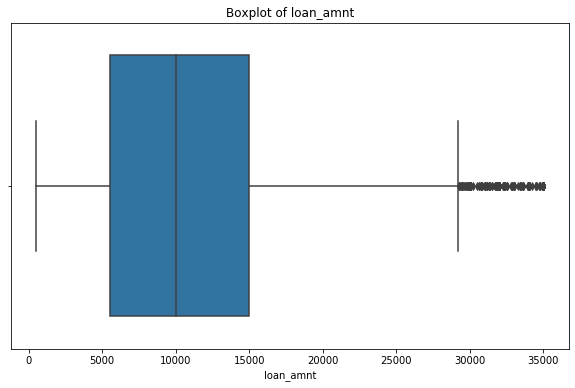

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_amnt',data=df)
plt.title("Boxplot of loan_amnt")
plt.show()

In [ ]:
Q1 = df['loan_amnt'].quantile(0.25)
Q3 = df['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1

data = df[((df['loan_amnt'] < (Q1 - 1.5 * IQR)) |(df['loan_amnt'] > (Q3 + 1.5 * IQR)))]

In [ ]:
data

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
31,31825.0,7.90,995.82,75000.0,Fully Paid,14.03,0.0,0.0,12.0,0.0,23151.0,27.4,26.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
80,35000.0,17.27,551.84,150000.0,Fully Paid,7.51,0.0,1.0,11.0,0.0,7334.0,53.3,31.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
128,35000.0,8.90,1111.37,125000.0,Fully Paid,22.71,0.0,0.0,8.0,0.0,9051.0,34.8,32.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
185,35000.0,10.65,1140.07,168000.0,Fully Paid,3.17,1.0,1.0,16.0,0.0,1099.0,1.4,22.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
209,29500.0,20.30,786.51,83000.0,Fully Paid,20.93,0.0,0.0,12.0,0.0,22087.0,89.8,35.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19864,32000.0,20.85,863.01,62400.0,Fully Paid,13.04,0.0,0.0,4.0,0.0,27618.0,97.2,11.0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
19875,32000.0,19.74,843.19,93500.0,Fully Paid,16.36,0.0,0.0,10.0,1.0,33036.0,73.9,12.0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
19889,30000.0,16.40,735.94,110000.0,Fully Paid,9.03,0.0,0.0,10.0,0.0,31675.0,55.2,37.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
19902,30000.0,17.88,759.85,360000.0,Fully Paid,11.35,0.0,3.0,17.0,0.0,51087.0,89.3,48.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
def cap_IQRscore_outliers(series, iqr_threshold=1.5, verbose=False):
    '''Caps outliers to closest existing value within threshold (IQR).'''
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lbound = Q1 - iqr_threshold * IQR
    ubound = Q3 + iqr_threshold * IQR

    outliers = (series < lbound) | (series > ubound)

    series = series.copy()
    series.loc[series < lbound] = series.loc[~outliers].min()
    series.loc[series > ubound] = series.loc[~outliers].max()

    # For comparison purposes.
    if verbose:
            print('\n'.join(
                ['Capping outliers by the IQR method:',
                 f'   IQR threshold: {iqr_threshold}',
                 f'   Lower bound: {lbound}',
                 f'   Upper bound: {ubound}\n']))

    return series

cap_IQRscore_outliers(df['loan_amnt'], verbose=True)

Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -8750.0
   Upper bound: 29250.0



0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39781     2500.0
39782     8500.0
39783     5000.0
39784     5000.0
39785     7500.0
Name: loan_amnt, Length: 38612, dtype: float64

#### **HAMPEL FILLTER | 3 std dev. Away Method**

Another method, known as Hampel filter, consists of considering as outliers the values outside the interval (
I
) formed by the median, plus or minus 3 median absolute deviations (
M
A
D
):

I
=
[
m
e
d
i
a
n
−
3
⋅
M
A
D
;
m
e
d
i
a
n
+
3
⋅
M
A
D
]

where 
M
A
D
 is the median absolute deviation and is defined as the median of the absolute deviations from the data’s median 
~
X
=
m
e
d
i
a
n
(
X
)
:

M
A
D
=
m
e
d
i
a
n
(
|
X
i
−
~
X
|
)

In [ ]:
from scipy import stats

In [ ]:
stats.zscore(df["loan_amnt"])

0       -0.844688
1       -1.179532
2       -1.192926
3       -0.174999
5       -0.844688
           ...   
39781   -1.179532
39782   -0.375906
39783   -0.844688
39784   -0.844688
39785   -0.509843
Name: loan_amnt, Length: 38612, dtype: float64

In [ ]:
stats.zscore(df["loan_amnt"]).max()

3.1734462815401483

In [ ]:
stats.zscore(df["loan_amnt"]).min()

-1.4474081084969297

In [ ]:
df[(np.abs(stats.zscore(df["loan_amnt"])) < 3)]

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,10.65,162.87,24000.0,Fully Paid,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2500.0,15.27,59.83,30000.0,Charged Off,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2400.0,15.96,84.33,12252.0,Fully Paid,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,10000.0,13.49,339.31,49200.0,Fully Paid,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,5000.0,7.90,156.46,36000.0,Fully Paid,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,8.07,78.42,110000.0,Fully Paid,11.33,0.0,0.0,13.0,0.0,7274.0,13.1,40.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
39782,8500.0,10.28,275.38,18000.0,Fully Paid,6.40,1.0,1.0,6.0,0.0,8847.0,26.9,9.0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
39783,5000.0,8.07,156.84,100000.0,Fully Paid,2.30,0.0,0.0,11.0,0.0,9698.0,19.4,20.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
39784,5000.0,7.43,155.38,200000.0,Fully Paid,3.72,0.0,0.0,17.0,0.0,85607.0,0.7,26.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
def cap_Zscore_outliers(series, zscore_threshold=3, verbose=False):
    '''Caps outliers to closest existing value within threshold (Modified Z-score).'''
    median_val = series.median()
    mad_val = series.mad() # Median absolute deviation

    z_score = (series - median_val) / mad_val
    outliers = abs(z_score) > zscore_threshold

    series = series.copy()
    series.loc[z_score > zscore_threshold] = series.loc[~outliers].max()
    series.loc[z_score < -zscore_threshold] = series.loc[~outliers].min() 

    # For comparison purposes.
    if verbose:
            lbound = median_val - zscore_threshold * mad_val
            ubound = median_val + zscore_threshold * mad_val
            print('\n'.join(
                ['Capping outliers by the Modified Z-score method:',
                 f'   Z-score threshold: {zscore_threshold}',
                 f'   Lower bound: {lbound}',
                 f'   Upper bound: {ubound}\n']))

    return series

cap_Zscore_outliers(df['loan_amnt'], verbose=True)

Capping outliers by the Modified Z-score method:
   Z-score threshold: 3
   Lower bound: -7762.4364865446805
   Upper bound: 27762.43648654468



0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39781     2500.0
39782     8500.0
39783     5000.0
39784     5000.0
39785     7500.0
Name: loan_amnt, Length: 38612, dtype: float64

### **Scaling Data**

https://scikit-learn.org/stable/modules/preprocessing.html

In [ ]:
from sklearn import preprocessing

In [ ]:
df[['loan_amnt',"int_rate"]].head(10)

,loan_amnt,int_rate
0,5000.0,10.65
1,2500.0,15.27
2,2400.0,15.96
3,10000.0,13.49
5,5000.0,7.90
6,7000.0,15.96
7,3000.0,18.64
8,5600.0,21.28
9,5375.0,12.69
10,6500.0,14.65


#### **Normalization:**
Min-Max Normalization

This technique rescales values to be in the **range between 0 and 1**. Also, the data ends up with smaller standard deviations, which can suppress the effect of outliers.

In [ ]:
# x- min
# -------
# max-min


# x -- min
# x -- max
# 0 --> 1


# min - min
# ----------   0
# max-min

# max - min
# ----------   1
# max- min

In [ ]:
 X_scaled = preprocessing.MinMaxScaler().fit_transform(df[['loan_amnt',"int_rate"]])

In [ ]:
X_scaled

array([[0.13043478, 0.27282212],
       [0.05797101, 0.51382368],
       [0.05507246, 0.54981742],
       ...,
       [0.13043478, 0.13823683],
       [0.13043478, 0.10485133],
       [0.20289855, 0.43453312]])

In [ ]:
pd.DataFrame(X_scaled,columns=(['loan_amnt',"int_rate"]))

,loan_amnt,int_rate
0,0.130435,0.272822
1,0.057971,0.513824
2,0.055072,0.549817
3,0.275362,0.420970
4,0.130435,0.129369
...,...,...
38607,0.057971,0.138237
38608,0.231884,0.253521
38609,0.130435,0.138237
38610,0.130435,0.104851


#### **Standardization**:

Standardization is a technique in which all the features have a mean around zero and have roughly **unit variance (mean = 0 and standard deviation = 1)**. And also makes sure that outliers get weighted more than other values.

In [ ]:
X_scaled = preprocessing.StandardScaler().fit_transform(df[['loan_amnt',"int_rate"]])

In [ ]:
X_scaled

array([[-0.84468797, -0.37666891],
       [-1.17953249,  0.86667247],
       [-1.19292627,  1.05236631],
       ...,
       [-0.84468797, -1.07100241],
       [-0.84468797, -1.24324018],
       [-0.50984345,  0.45760777]])

In [ ]:
pd.DataFrame(X_scaled,columns=(['loan_amnt',"int_rate"]))

,loan_amnt,int_rate
0,-0.844688,-0.376669
1,-1.179532,0.866672
2,-1.192926,1.052366
3,-0.174999,0.387636
4,-0.844688,-1.116753
...,...,...
38607,-1.179532,-1.071002
38608,-0.375906,-0.476244
38609,-0.844688,-1.071002
38610,-0.844688,-1.243240


### **Feature Emgineering|Extraction**